In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1- Data Preparation

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
# !wget $data

In [2]:
df = pd.read_csv('data.csv')
len(df)

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2- EDA (Exploratory Data Analysis)

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of price

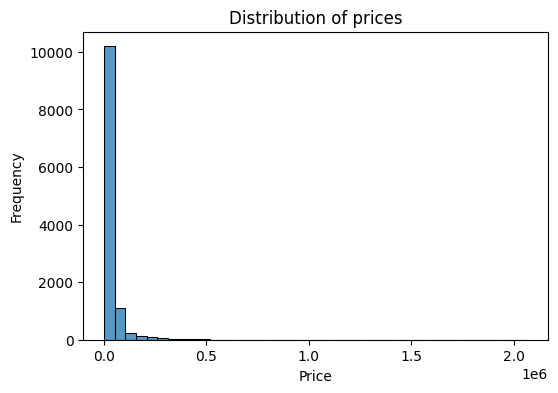

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

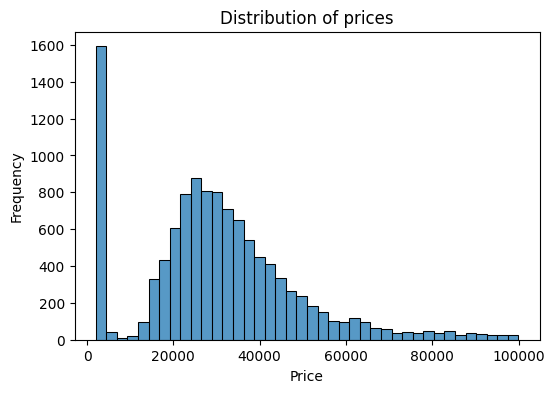

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

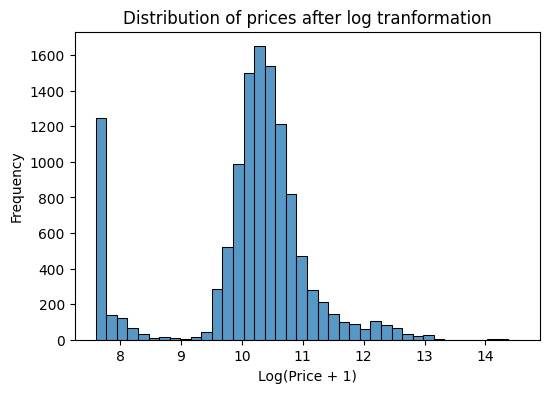

In [12]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

### Missing values

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 3- Setting up the validation framework

In [14]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [15]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [16]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [20]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 4- Linear Regression implementation

### Simplified form

In [21]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [22]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [23]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.312

In [24]:
print(np.expm1(12.312))

222347.2221101062


### Vector form

In [25]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [26]:
def linear_regression(xi):
    return w0 + dot(xi, w)

#### Shorter notation

In [27]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [28]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [29]:
linear_regression(xi)

12.312

In [30]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [31]:
def linear_regression(X):
    return X.dot(w_new)

In [32]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Normal equation

In [33]:
def train_linear_regression(X, y):
    pass

#### Matrix X

In [34]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [35]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

#### Vector y

In [37]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

#### Compute w with the Gram Matrix and its inverse

In [38]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [39]:
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [40]:
w0 = w_full[0]
w = w_full[1:]
print(w0), w

25844.754055766753


(None, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [41]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## 5- Car price Baseline Model

In [43]:
base = list(df.dtypes[df.dtypes != object].index)
base.remove('year')
base.remove('number_of_doors')
base.remove('msrp')
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [44]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [45]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [46]:
w0, w = train_linear_regression(X_train, y_train)

In [47]:
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [48]:
y_pred = w0 + X_train.dot(w)

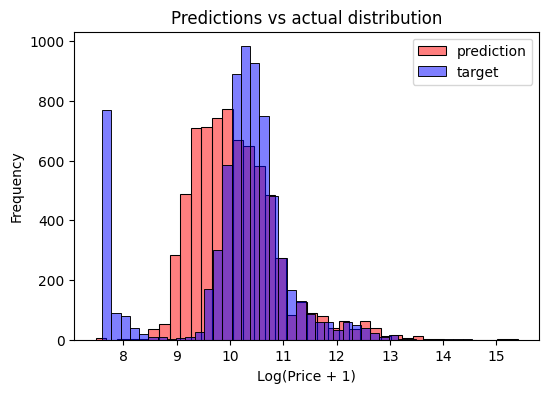

In [49]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=40)
sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## 6- Validating the model

### Root Mean Squared Error

In [50]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [51]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Computing RMSE on Validation data

In [52]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [53]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [54]:
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 7- Feature Engineering

### Simple: Adding age of the car based on 'year' feature

In [55]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [56]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058299


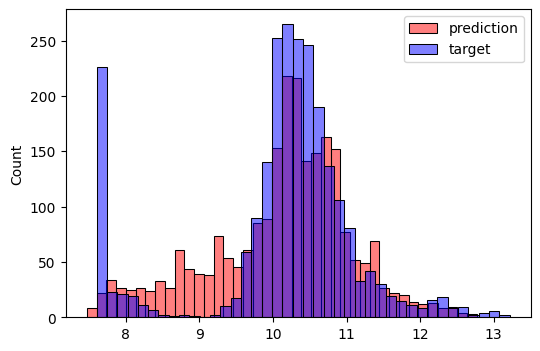

In [57]:
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=40)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=40)
plt.legend()

### Categorical Variables: One-hot encoding

#### First example with 'number of doors'

In [58]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5150615580371418
validation 0.515799564150169


Compare to the previous RMSE at 0.517, 'number of doors' attribute only is negligible

#### Adding other categorical features

In [60]:
categorical_columns = list(df.dtypes[df.dtypes == object].index)
categorical_columns.remove('model') # too much values in this category
categorical_columns

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [61]:
categorical = {}

for c in categorical_columns:
    categorical[c] = list(df[c].value_counts().head().index)
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [62]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df.number_of_doors == v).astype(int)
        features.append(feature)

    for name, values in categorical.items():
        for value in values:
            feature = '%s_%s' % (name, value)
            df[feature] = (df[name] == value).astype(int)
            features.append(feature)

    df_feat = df[features]
    df_feat = df_feat.fillna(0)
    X = df_feat.values
    
    return X

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 35.63386933735464
validation 23.019020704791835


In [64]:
w0, w

(np.float64(4011091003551887.0),
 array([ 5.17477261e-02,  5.87434156e+00,  2.58988500e+00, -9.14739385e-01,
         3.29434090e-03,  1.26747065e+00,  1.09365186e+03,  1.08197230e+03,
         1.08519232e+03, -2.94630727e+00, -7.48076191e+00,  1.02357603e+01,
        -8.56657044e-01, -2.27736086e+00,  1.84973907e+00, -3.51656880e+00,
        -2.20958315e+00,  6.07018281e+00, -3.32427158e+01, -4.60060984e+15,
        -4.60060984e+15, -4.60060984e+15, -4.60060984e+15, -4.60060984e+15,
         5.89518839e+14,  5.89518839e+14,  5.89518839e+14,  5.89518839e+14,
        -9.26775404e-01,  3.51631589e-01,  1.80584944e-01,  1.46169331e+00,
        -1.67201746e+00, -3.59104780e+00, -6.16304692e+00, -5.45706022e+00,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

## 8- Regularization

In [65]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.4602097278680805
validation 0.45651750867781377


### Tuning the model

In [67]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('%6s' %r, w0, score)

   0.0 4011091003551887.0 23.019020704791835
 1e-05 6.178192055025445 0.45651702823445617
0.0001 6.317246071243372 0.4565170654323052
 0.001 6.285636717989048 0.45651750867781377
   0.1 6.1912087238544915 0.4565692763007501
     1 5.634896668066369 0.45722043179930605
    10 4.283980108968471 0.4701456932099909


## 9- Using the model

### Train on (df_train + df_val) dataset

In [68]:
df_full_train = pd.concat([df_train, df_val])

In [69]:
df_full_train = df_full_train.reset_index(drop=True)

In [70]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [71]:
y_full_train = np.concatenate([y_train, y_val])

In [72]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

### Calculate RMSE on df_test

In [73]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

0.4517749310621406


### Final check on a random car in df_test

In [74]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [75]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [76]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.462651700289744)

In [77]:
print('predicted value: ', np.expm1(y_pred))
print('actual value: ', np.expm1(y_test[20]))

predicted value:  34983.19616272936
actual value:  35000.00000000001


## 10- Further experiments

**What happen if we take top 10 values instead of 5 in the categorical features?**

In [81]:
new_categorical = {}

for c in categorical_columns:
    new_categorical[c] = list(df[c].value_counts().iloc[:10].index)
new_categorical

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible'

In [83]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df.number_of_doors == v).astype(int)
        features.append(feature)

    for name, values in new_categorical.items():
        for value in values:
            feature = '%s_%s' % (name, value)
            df[feature] = (df[name] == value).astype(int)
            features.append(feature)

    df_feat = df[features]
    df_feat = df_feat.fillna(0)
    X = df_feat.values
    
    return X

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.4455904153608543
validation 0.44224994318816263


In [89]:
for r in [0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print('%6s' %r, w0, score)

 1e-05 -0.03443859265569105 0.44225456958841836
0.0001 6.058902213805628 0.4422540952343298
 0.001 6.150152092917546 0.44224994318816263
   0.1 5.874012547151461 0.44217224444179504
     1 5.275129780666722 0.4429556199379228
    10 4.178858708142004 0.4553590507544968


**Testing linear regression with scikit-learn library**

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
model = LinearRegression()

In [93]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_val)

In [95]:
score = model.score(X_val, y_val)
print('Accuracy:', score)

Accuracy: 0.832296737650591


In [96]:
print('w0:', model.intercept_), print('w:', model.coef_)

w0: 10.977168525333619
w: [ 1.26774806e-03  9.89086472e-02 -6.29235463e-03 -8.58678462e-03
 -3.17243435e-05 -9.86954872e-02 -5.65231316e-01 -6.57454547e-01
 -3.52158304e-01 -3.91821763e-02  9.10812918e-02 -1.30175266e-03
 -1.24728265e-01 -1.36219469e-01 -2.56755448e-01  1.88730698e-05
  3.07958536e-03  3.13446232e-02  2.25991775e-01 -5.26196541e-01
 -4.50967046e-03 -3.56300428e-01 -6.60106035e-01 -2.13963394e-01
  1.34972366e+00  2.20387423e-02 -2.50730826e-01 -3.24445299e-01
  2.74780199e-15  9.57825888e-02 -8.02918972e-02  1.10910465e-01
  3.77135056e-01 -5.03536213e-01 -1.72458314e-02 -2.03080329e-02
  9.58643459e-03  2.79674296e-02 -1.07834463e-01  1.11006005e-01
 -1.25969395e-01 -1.35591485e-01 -1.23025578e-01 -1.36172611e-01
 -1.33662232e-01 -6.39250007e-02  5.42296758e-01 -1.09560722e-01
  6.31362250e-02 -2.58551649e-02 -3.72810601e-02  4.73781841e-02
  1.26595135e-01  2.91694533e-01  4.74222787e-01  1.05743803e-02
 -2.53135759e-02 -6.34758144e-02  1.52371014e-01  3.05193907e-01

(None, None)

In [103]:
print('rmse: %.2f' % mean_squared_error(y_val, y_pred)),
print('R2 score: %.2f' % r2_score(y_val, y_pred))

rmse: 0.20
R2 score: 0.83
